In [1]:
from preprocessor import Preprocessor
from batch_generator import BatchGenerator
from modelling import Mothership
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
# batch_generator = BatchGenerator(pp, 64)
batch_generator = BatchGenerator(64, 64)

In [3]:
model = Mothership(27, [102, 42], 23, [102, 102, 42], 10, [2, 2], [2, 2, 2])
#model = Mothership(27, [], 22, [], 10, [], [])

In [4]:
model.compile(Adam(lr=.01), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [5]:
model.fit_generator(batch_generator, epochs=2)

Epoch 1/2
767/767 [==============================] - 7s 9ms/step - loss: 0.8644 - acc: 0.6445
Epoch 2/2
767/767 [==============================] - 6s 7ms/step - loss: 0.5318 - acc: 0.7423


In [6]:
import sys

In [7]:
sys.path.append('../nikita')

In [8]:
from evaluating import permutation_importance

In [9]:
batch_generator = BatchGenerator(1024, 1024)

In [10]:
import pickle

In [11]:
with open('pro_feature_dict.pickle', 'rb') as file:
    pfd = pickle.load(file)

In [12]:
len(pfd)

10015

In [23]:
fn = {
  "que": [
    "students_location",
    "students_state",
    "students_questions_asked",
    "students_average_question_age",
    "students_average_question_body_length",
    "students_average_answer_body_length",
    "students_date_joined_time",
    "students_date_joined_doy_sin",
    "students_date_joined_doy_cos",
    "students_date_joined_dow",
    "questions_body_length",
    "questions_date_added_time",
    "questions_date_added_doy_sin",
    "questions_date_added_doy_cos",
    "questions_date_added_dow",
    "questions_date_added_hour_sin",
    "questions_date_added_hour_cos",
  ],
  "pro": [
    "professionals_industry",
    "professionals_location",
    "professionals_state",
    "professionals_questions_answered",
    "professionals_average_question_age",
    "professionals_average_question_body_length",
    "professionals_average_answer_body_length",
    "professionals_email_activated",
    "professionals_date_joined_time",
    "professionals_date_joined_doy_sin",
    "professionals_date_joined_doy_cos",
    "professionals_date_joined_dow",
    "professionals_last_answer_date_time",
  ]
}

In [24]:
fn['que'] += [f'que_emb_{i}' for i in range(10)]

In [25]:
fn['pro'] += [f'pro_emb_{i}' for i in range(10)]

In [26]:
fn['text'] = [f'que_emb_{i}' for i in range(10)] + [f'pro_emb_{i}' for i in range(10)]

In [27]:
len(fn['que']), len(fn['pro'])

(27, 23)

In [28]:
batch_generator[0][0][0].shape, batch_generator[0][0][1].shape

((2048, 27), (2048, 23))

In [29]:
from jupyterthemes import jtplot
jtplot.style('gruvboxd')

In [30]:
import evaluating

In [31]:
import imp
imp.reload(evaluating)

<module 'evaluating' from 'C:\\Users\\dell\\Notebooks\\cv\\kostya\\evaluating.py'>

In [32]:
fi = evaluating.permutation_importance(model, batch_generator[0][0][0], batch_generator[0][0][1], batch_generator[0][1], fn)

2048/2048 [==============================] - ETA:  - ETA:  - ETA:  - 0s 55us/step


In [33]:
fi

,importance
professionals_last_answer_date_time,-0.108811
students_average_question_age,-0.039311
que_emb_4,-0.006578
pro_emb_0,-0.005226
pro_emb_7,-0.004669
questions_date_added_doy_cos,-0.003504
pro_emb_5,-0.003422
que_emb_0,-0.002810
professionals_email_activated,-0.002664
students_date_joined_dow,-0.002043


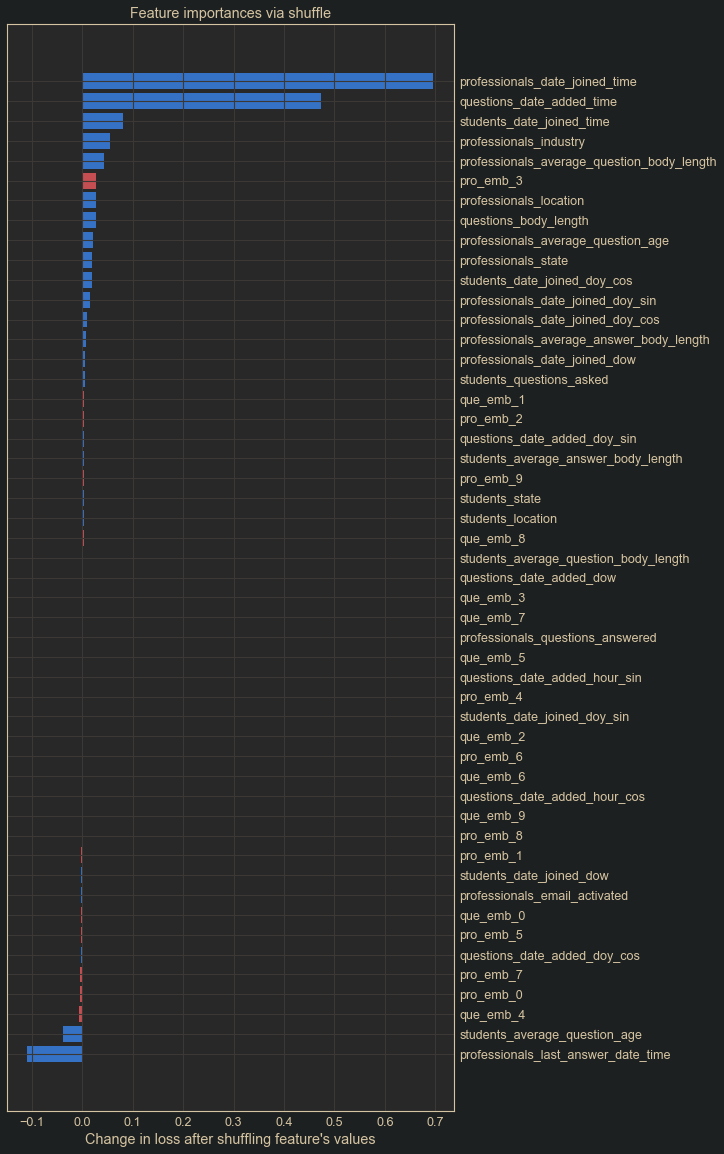

In [34]:
evaluating.plot_fi(fi, fn)